# Unit Simulation Experimental Notebook

In [1]:
from IPython.display import HTML
import numpy as np
import pandas as pd
from matplotlib import animation
import matplotlib.pyplot as plt
%matplotlib inline
# our simulator
import battlesim as bsm

In [36]:
l, r, b, t = -5, 5, -5, 5
Nx,Ny=(r-l), (t-b)

In [37]:
from scipy import stats

In [56]:
T = bsm.Terrain((l, r, b, t), res=.1, form="contour")

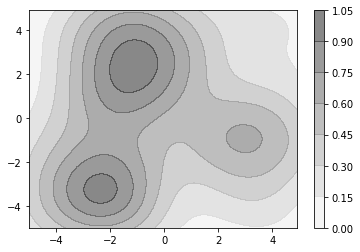

In [91]:
T.generate(n_random=30)

fig, ax = plt.subplots()
cax = T.plot(ax, alpha=.5)
fig.colorbar(cax)

### Trial 1. 50 Clone Troopers vs. 80 B1 battledroids

Using Random AI selection for targets.

In [2]:
trial1 = bsm.Battle("datasets/starwars-clonewars.csv")
# define 100 battledroids, 50 clones
trial1.create_army([("B1 battledroid", 110), ("Clone Trooper", 20), ("Clone Trooper", 20)])
# battle droids near (0, 0), clones near (10, 10)
trial1.apply_position([
    dict(name="uniform", scale=2.),
    dict(name="gaussian", loc=10.),
    dict(name="gaussian", x_loc=7., y_loc=5.),
])
#init, rolling AIs now default to 'nearest'
trial1.set_ai_decision(["aggressive","hit_and_run","hit_and_run"])

# run a battle
F = trial1.simulate(max_step=500)

In [3]:
trial1.composition_

,unit,allegiance,n,position,init_ai,rolling_ai,decision_ai
0,b1 battledroid,CIS,110,uniform,nearest,nearest,aggressive
1,clone trooper,Republic,20,gaussian,nearest,nearest,hit_and_run
2,clone trooper,Republic,20,gaussian,nearest,nearest,hit_and_run


In [21]:
HTML(trial1.sim_jupyter().to_jshtml())

In [9]:
trial1.sim_export("simulations/main.gif",writer="imagemagick")

## Testing Performance Profiling

In [10]:
%timeit trial1.simulate()

1.71 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### With and without hit-and-run tactics..  Wow

In [11]:
trial1.set_ai_decision(["aggressive","hit_and_run","hit_and_run"])
F = trial1.simulate_k(10,max_step=500)

trial1.set_ai_decision(["aggressive"]*3)
F2 = trial1.simulate_k(10,max_step=500)

scale = lambda x: x / trial1.n_allegiance_[x.name]

C = pd.concat([
    F.melt(var_name="team", value_name="number of units").assign(Run="w/ hit and run"),
    F2.melt(var_name="team", value_name="number of units").assign(Run="w/o hit and run"),
], axis=0)

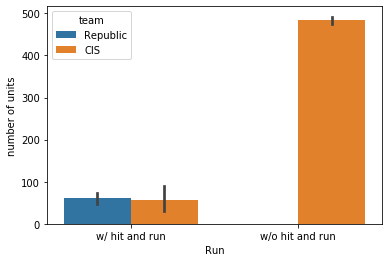

In [12]:
import seaborn as sns
sns.barplot(data=C, x="Run", y="number of units", hue="team")
plt.show()

In [13]:
%prun trial1.simulate()